# Configures the Notebook

In [ ]:
# Make sure needed packages are installed and up-to-date
import sys
!conda install --yes --prefix {sys.prefix} numpy scipy matplotlib scikit-learn Ipython ipywidgets h5py 
!{sys.executable} -m pip install -U BGlib  # this will automatically install sidpy and pyUSID as well

/bin/bash: conda: command not found
     |████████████████████████████████| 194kB 5.3MB/s 
     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 788kB 13.5MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 481kB 21.4MB/s 
     |████████████████████████████████| 368kB 21.2MB/s 
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.7-cp37-none-any.whl size=21327 sha256=7c7be7c56d91222c8711abfbee349f34118f44f8c1c1b12272ac5dfbfe54daeb
  Stored in directory: /root/.cache/pip/wheels/9e/19/02/30e0a1918ddc498ccdd5dab91b3bfce6100bfd0d416db622c9
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp37-cp37m-linux_x86_64.whl size=1223260 sha256=9a798335d2e2a8f3f693eac8abccda6d2629e655ea70baf2a9c3e140f72e8930
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
Successfully built numpy-groupies cytoolz
ERROR: jupyter-console 5.2.0 has requirement

In [ ]:
!pip install -U pyUSID==0.0.9

     |████████████████████████████████| 174kB 5.8MB/s 
  Found existing installation: pyUSID 0.0.10
    Uninstalling pyUSID-0.0.10:
      Successfully uninstalled pyUSID-0.0.10


# Imports Packages

In [ ]:
import gdown

# Import necessary libraries:
# General utilities:
import os

# Computation:
import numpy as np
import h5py

# Visualization:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# The engineering components supporting BGlib:
import sidpy
import pyUSID as usid
# Finally, BGlib itself
from BGlib import be as belib

from pyUSID.io.hdf_utils import reshape_to_n_dims, get_sort_order, \
    get_dimensionality, get_source_dataset, get_auxiliary_datasets, \
    get_attr

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


# Downloads the data file

In [ ]:
# dowloads the original experiment file
gdown.download('https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2', 'data_file.h5', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2
To: /content/data_file.h5
1.80GB [00:08, 219MB/s]


'data_file.h5'

In [ ]:
def load_data_USID(input_file_path, max_mem=1024*8, max_cores = None, results_to_new_file = False):

        
    (data_dir, filename) = os.path.split(input_file_path)

    if input_file_path.endswith('.h5'):
        # No translation here
        h5_path = input_file_path
        force = True # Set this to true to force patching of the datafile.
        tl = belib.translators.LabViewH5Patcher()
        tl.translate(h5_path, force_patch=force)
    else:
        # Set the data to be translated
        self.data_path = input_file_path

        (junk, base_name) = os.path.split(data_dir)

        # Check if the data is in the new or old format.  Initialize the correct translator for the format.
        if base_name == 'newdataformat':
            (junk, base_name) = os.path.split(junk)
            translator = belib.translators.BEPSndfTranslator(max_mem_mb=max_mem)
        else:
            translator = belib.translators.BEodfTranslator(max_mem_mb=max_mem)
        if base_name.endswith('_d'):
            base_name = base_name[:-2]
        # Translate the data
        print(translator)
        h5_path = translator.translate(data_path, show_plots=True, save_plots=False)
        
    folder_path, h5_raw_file_name = os.path.split(h5_path)
    h5_file = h5py.File(h5_path, 'r+')
    print('Working on:\n' + h5_path)

    h5_main = usid.hdf_utils.find_dataset(h5_file, 'Raw_Data')[0]
        
    return h5_main, h5_file, h5_path

In [ ]:
h5_main, h5_file, h5_path = load_data_USID('./data_file.h5')

Working on:
./data_file.h5


In [ ]:
print('Datasets and datagroups within the file:\n------------------------------------')
sidpy.hdf.hdf_utils.print_tree(h5_file)
 
print('\nThe main dataset:\n------------------------------------')
print(h5_main)

print('\nMetadata or attributes in the measurement datagroup\n------------------------------------')
for key, val in sidpy.hdf.hdf_utils.get_attributes(h5_main.parent.parent).items():
    print('{} : {}'.format(key, val))

Datasets and datagroups within the file:
------------------------------------
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Avera

In [ ]:
def extract_basic_parameters(h5_main):
    h5_pos_inds = h5_main.h5_pos_inds
    pos_dims = h5_main.pos_dim_sizes
    pos_labels = h5_main.pos_dim_labels
    print(pos_labels, pos_dims)

    h5_meas_grp = h5_main.parent.parent

    parm_dict = sidpy.hdf.hdf_utils.get_attributes(h5_meas_grp)

    expt_type = sidpy.hdf.hdf_utils.get_attr(h5_file, 'data_type')

    is_ckpfm = expt_type == 'cKPFMData'
    if is_ckpfm:
        num_write_steps = parm_dict['VS_num_DC_write_steps']
        num_read_steps = parm_dict['VS_num_read_steps']
        num_fields = 2

    if expt_type != 'BELineData':
        vs_mode = sidpy.hdf.hdf_utils.get_attr(h5_meas_grp, 'VS_mode')
        try:
            field_mode = sidpy.hdf.hdf_utils.get_attr(h5_meas_grp, 'VS_measure_in_field_loops')
        except KeyError:
            print('field mode could not be found. Setting to default value')
            field_mode = 'out-of-field'
        try:
            vs_cycle_frac = sidpy.hdf.hdf_utils.get_attr(h5_meas_grp, 'VS_cycle_fraction')
        except KeyError:
            print('VS cycle fraction could not be found. Setting to default value')
            vs_cycle_frac = 'full'
            
    return 

In [ ]:
def be_fit(h5_main, sho_fit_points = 5, sho_override = False, h5_sho_targ_grp = None, \
           max_mem=1024*8, max_cores = None):
    sho_fitter = belib.analysis.BESHOfitter(h5_main, cores=max_cores, verbose=False, h5_target_group=h5_sho_targ_grp)
    sho_fitter.set_up_guess(guess_func=belib.analysis.be_sho_fitter.SHOGuessFunc.complex_gaussian,
                            num_points=sho_fit_points)
    h5_sho_guess = sho_fitter.do_guess(override=sho_override)
    sho_fitter.set_up_fit()
    h5_sho_fit = sho_fitter.do_fit(override=sho_override)
    h5_sho_grp = h5_sho_fit.parent
    return h5_sho_fit, h5_sho_grp

In [ ]:
h5_sho_fit, h5_sho_grp = be_fit(h5_main)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file

Note: SHO_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000" (7 members)>]

Note: SHO_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000" (7 members)>]
Returned previously computed results at /Measurement_000/Channel_000/Raw_Data-SHO_Fit_000

Note: SHO_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000" (7 membe

In [ ]:
def fit_loop_function(h5_file, h5_sho_fit, loop_success = False, h5_loop_group = None,\
                      results_to_new_file = False, max_mem=1024*8, max_cores = None):
    
    expt_type = sidpy.hdf.hdf_utils.get_attr(h5_file, 'data_type')
    h5_meas_grp = h5_main.parent.parent
    vs_mode = sidpy.hdf.hdf_utils.get_attr(h5_meas_grp, 'VS_mode')
    
    try:
        vs_cycle_frac = sidpy.hdf.hdf_utils.get_attr(h5_meas_grp, 'VS_cycle_fraction')
    except KeyError:
        print('VS cycle fraction could not be found. Setting to default value')
        vs_cycle_frac = 'full'
        
    if results_to_new_file:
        h5_loop_file_path = os.path.join(folder_path, 
                                         h5_raw_file_name.replace('.h5', '_loop_fit.h5'))
        print('\n\nLoop Fits will be written to:\n' + h5_loop_file_path + '\n\n')
        f_open_mode = 'w'
        if os.path.exists(h5_loop_file_path):
            f_open_mode = 'r+'
        h5_loop_file = h5py.File(h5_loop_file_path, mode=f_open_mode)
        h5_loop_group = h5_loop_file
        
    loop_fitter = belib.analysis.BELoopFitter(h5_sho_fit, expt_type, vs_mode, vs_cycle_frac,
                                           cores=max_cores, h5_target_group=h5_loop_group, 
                                           verbose=False)
    loop_fitter.set_up_guess()
    h5_loop_guess = loop_fitter.do_guess(override=False)
    # Calling explicitely here since Fitter won't do it automatically
    h5_guess_loop_parms = loop_fitter.extract_loop_parameters(h5_loop_guess)

    loop_fitter.set_up_fit()
    h5_loop_fit = loop_fitter.do_fit(override=False)
    h5_loop_group = h5_loop_fit.parent
    loop_success = True
    return h5_loop_fit, h5_loop_group

In [ ]:
h5_loop_fit, h5_loop_group = fit_loop_function(h5_file, h5_sho_fit)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000" (7 members)>]
Resuming computation. 0% completed already
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If y

In [ ]:
sidpy.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Fit-Loop_Fit_000
        ----------------
        ├ Fit
        ├ Fit_Loop_Parameters
        ├ Guess
        ├ Guess_Loop_Parameters
        ├ Loop_Metrics
        ├ Loop_Metrics_Indices
        ├ Loop_Metrics_Values
        ├ Projected_Loops
        ├ completed_fit_positions
        ├ completed_guess_positions
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
      ├ completed_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spec

In [ ]:
step_chan='DC_Offset'
cmap=None

h5_projected_loops = sidpy.hdf_utils.find_dataset(h5_file, 'Projected_Loops')[0]
h5_loop_guess = sidpy.hdf_utils.find_dataset(h5_file, 'Guess')[-2:][0]
h5_loop_fit = sidpy.hdf_utils.find_dataset(h5_file, 'Fit')[-1:][0]

# Prepare some variables for plotting loops fits and guesses
# Plot the Loop Guess and Fit Results
proj_nd, _ = reshape_to_n_dims(h5_projected_loops)
guess_nd, _ = reshape_to_n_dims(h5_loop_guess)
fit_nd, _ = reshape_to_n_dims(h5_loop_fit)

h5_projected_loops = h5_loop_guess.parent['Projected_Loops']
h5_proj_spec_inds = get_auxiliary_datasets(h5_projected_loops,
                                           aux_dset_name='Spectroscopic_Indices')[-1]
h5_proj_spec_vals = get_auxiliary_datasets(h5_projected_loops,
                                           aux_dset_name='Spectroscopic_Values')[-1]
h5_pos_inds = get_auxiliary_datasets(h5_projected_loops,
                                     aux_dset_name='Position_Indices')[-1]
pos_nd, _ = reshape_to_n_dims(h5_pos_inds, h5_pos=h5_pos_inds)
pos_dims = list(pos_nd.shape[:h5_pos_inds.shape[1]])
pos_labels = get_attr(h5_pos_inds, 'labels')


# reshape the vdc_vec into DC_step by Loop
spec_nd, _ = reshape_to_n_dims(h5_proj_spec_vals, h5_spec=h5_proj_spec_inds)
loop_spec_dims = np.array(spec_nd.shape[1:])
loop_spec_labels = get_attr(h5_proj_spec_vals, 'labels')

spec_step_dim_ind = np.where(loop_spec_labels == step_chan)[0][0]

# # move the step dimension to be the first after all position dimensions
rest_loop_dim_order = list(range(len(pos_dims), len(proj_nd.shape)))
rest_loop_dim_order.pop(spec_step_dim_ind)
new_order = list(range(len(pos_dims))) + [len(pos_dims) + spec_step_dim_ind] + rest_loop_dim_order

new_spec_order = np.array(new_order[len(pos_dims):], dtype=np.uint32) - len(pos_dims)

# Also reshape the projected loops to Positions-DC_Step-Loop
final_loop_shape = pos_dims + [loop_spec_dims[spec_step_dim_ind]] + [-1]
proj_nd2 = np.moveaxis(proj_nd, spec_step_dim_ind + len(pos_dims), len(pos_dims))
proj_nd_3 = np.reshape(proj_nd2, final_loop_shape)

# Do the same for the guess and fit datasets
guess_3d = np.reshape(guess_nd, pos_dims + [-1])
fit_3d = np.reshape(fit_nd, pos_dims + [-1])

# Get the bias vector:
spec_nd2 = np.moveaxis(spec_nd[spec_step_dim_ind], spec_step_dim_ind, 0)
bias_vec = np.reshape(spec_nd2, final_loop_shape[len(pos_dims):])

# Shift the bias vector and the loops by a quarter cycle
shift_ind = int(-1 * bias_vec.shape[0] / 4)
bias_shifted = np.roll(bias_vec, shift_ind, axis=0)
proj_nd_shifted = np.roll(proj_nd_3, shift_ind, axis=len(pos_dims))

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values


In [ ]:
guess_3d.shape

(60, 60, 4)

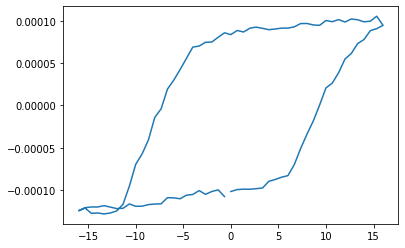

In [ ]:
plt.plot(bias_vec[:,0], proj_nd[20,20,:,1,1])

In [ ]:
proj_nd[20,20,:,1,0].shape

(96,)

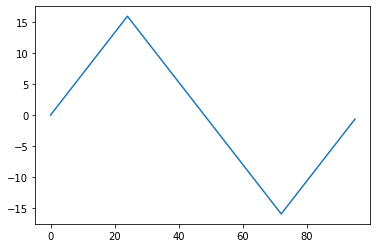

In [ ]:
plt.plot(bias_vec[:,2])

In [ ]:
import codes.util.core as core
import codes.util.file as file
import codes.util.machine_learning as ml
import codes.util.dictionary_learning as dl

ModuleNotFoundError: ignored

In [ ]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
from skimage import io
import string
import datetime
#import tensorflow_probability as tfp
import sys
#sys.path.append('/content/pyNSID/')
#import pyNSID as nsid
import matplotlib.pyplot as plt
#import sidpy as sid
#import h5py
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from os.path import join as pjoin
from scipy import ndimage
import os
from numpy.random import seed
from tqdm import tqdm
from sklearn.decomposition import PCA, NMF, DictionaryLearning
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FormatStrFormatter
from sklearn.decomposition import NMF
from scipy import io as ios
import os.path
from matplotlib import cm
from scipy.signal import savgol_filter as sg
from scipy import interpolate
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd

In [ ]:
# imports the raw band excitation data dictionary learning
imported = {'data': ios.matlab.loadmat('./Data.mat'),
            'validation_data': ios.matlab.loadmat('./loop_1.mat')}

In [ ]:
# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi2_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

In [ ]:
np.random.randint(0,60,2)

In [ ]:
# this transposes the raw data just for compairison
raw['val_piezoresponse']= np.transpose(raw['val_piezoresponse'],(1,0,2))

In [ ]:
i = np.random.randint(0,60,2)

plt.plot(bias_vec[:,0], proj_nd[i[0],i[1],:,1,0])
plt.plot(bias_vec[:,0], proj_nd[i[0],i[1],:,1,1])
plt.plot(bias_vec[:,0], raw['val_piezoresponse'][i[0],i[1],:], 'r')
plt.plot(bias_vec[:,0], raw['piezoresponse'][i[0],i[1],:], 'r')

In [ ]:
plt.plot(bias_vec[:,0], proj_nd_['Frequency [Hz]'][20,20,:,1,1])

In [ ]:
plt.imshow(np.transpose(raw['resonance'],(1,0,2))[:,:,20])

In [ ]:
plt.imshow(proj_nd_['Frequency [Hz]'][:,:,20,1,0])

In [ ]:
plt.plot(bias_vec[:,0], proj_nd_['Frequency [Hz]'][20,20,:,1,1])
plt.plot(bias_vec[:,0], np.transpose(raw['resonance'],(1,0,2))[20,20,:]*1000,'r')

In [ ]:
plt.plot(bias_vec[:,0], np.transpose(raw['resonance'],(1,0,2))[20,20,:],'r')

In [ ]:
i = np.random.randint(0,60,2)

plt.plot(bias_vec[:,0], proj_nd[i[0],i[1],:,1,0])
plt.plot(bias_vec[:,0], proj_nd[i[0],i[1],:,1,1])
plt.plot(vol, raw['val_piezoresponse'][i[0],i[1],:], 'r')
plt.plot(vol, raw['piezoresponse'][i[0],i[1],:], 'r')

In [ ]:
#Extract voltage data
v_cycle = imported['data']['VoltageDC_mixed'][:,0].squeeze()

In [ ]:
plt.plot(v_cycle)

In [ ]:
i = np.random.randint(0,60,2)

plt.plot(proj_nd[i[0],i[1],:,1,0])
plt.plot(proj_nd[i[0],i[1],:,1,1])
plt.plot(raw['val_piezoresponse'][i[0],i[1],:], 'r')
plt.plot(raw['piezoresponse'][i[0],i[1],:], 'r')

In [ ]:
plt.plot(vol)

In [ ]:
vol = np.load('voltage.npy')

In [ ]:
?? sidpy.io.interface_utils.cr

In [ ]:
?? belib.analysis.BESHOfitter

In [ ]:
sidpy.hdf_utils.print_tree(h5_file)

In [ ]:
h5_projected_loops = sidpy.hdf_utils.find_dataset(h5_file, 'Projected_Loops')

In [ ]:
h5_projected_loops

In [ ]:
sidpy.hdf.hdf_utils.get_attributes(h5_main.parent.parent)

In [ ]:
?? write_main_dataset

In [ ]:
h5_main.shape[0]

In [ ]:
np.random.randint

In [ ]:
h5_result_group = sidpy.hdf.prov_utils.find_results_groups(h5_main, 'Raw_Data-SHO_Fit_000')
num_udvs_steps = sidpy.hdf.hdf_utils.get_attributes(h5_main.parent.parent,attr_names='num_udvs_steps')

self._h5_guess = write_main_dataset(# The result group where to save the data
                                    h5_result_group,
                                        (h5_main.shape[0],
                                          num_udvs_steps),
                                        'Random', # main dataset Name
                                        'some_data', # Name of the physical quantity to store
                                        'none',
                                        None, None,
                                        h5_pos_inds=h5_main.h5_pos_inds,
                                        h5_pos_vals=h5_main.h5_pos_vals,
                                        h5_spec_inds=h5_sho_inds,
                                        h5_spec_vals=h5_sho_vals,
                                        chunks=(1, num_udvs_steps),
                                        dtype=sho32,
                                        main_dset_attrs=self.parms_dict)